## Scrapping World Population Data from Worldometer website 

# Introduction:
## Below is a sortable list of countries by their population scrapped from worldometer.info website on 03 may 2022. There are 235 countries along with their population. And there are 11 columns each representing different features of countries.



### Importing required Libraries

In [70]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
plt.style.use("seaborn")

In [ ]:
url = 'https://www.worldometers.info/world-population/population-by-country/'
requests.get(url)
page = requests.get(url)

soup = BeautifulSoup(page.text, 'lxml')
print(soup)

table_data = soup.find('table', class_ = 'table table-striped table-bordered')

headers = []
for i in table_data.find_all('th'):
    title = i.text
    headers.append(title)

data = pd.DataFrame(columns = headers)
print(data)

for j in table_data.find_all('tr')[1:]:
        row_data = j.find_all('td')
        row = [tr.text for tr in row_data]
        length = len(data)
        data.loc[length] = row
        
print (data)

### Basic Inspection of the Scrapped Data

In [23]:
data.shape

(235, 12)

In [24]:
data.head()

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,"1,439,323,776",0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
1,2,India,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
2,3,United States,"331,002,651",0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
3,4,Indonesia,"273,523,615",1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
4,5,Pakistan,"220,892,340",2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %


In [8]:
data.dtypes

#                          object
Country (or dependency)    object
Population (2020)          object
Yearly Change              object
Net Change                 object
Density (P/Km²)            object
Land Area (Km²)            object
Migrants (net)             object
Fert. Rate                 object
Med. Age                   object
Urban Pop %                object
World Share                object
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   #                        235 non-null    object
 1   Country (or dependency)  235 non-null    object
 2   Population (2020)        235 non-null    object
 3   Yearly Change            235 non-null    object
 4   Net Change               235 non-null    object
 5   Density (P/Km²)          235 non-null    object
 6   Land Area (Km²)          235 non-null    object
 7   Migrants (net)           235 non-null    object
 8   Fert. Rate               235 non-null    object
 9   Med. Age                 235 non-null    object
 10  Urban Pop %              235 non-null    object
 11  World Share              235 non-null    object
dtypes: object(12)
memory usage: 23.9+ KB


### Taking a look into the data Scrapped from the website there are few issues such as all numeric columns are read as object or category by python. This is because the numbers are entered as string and there are comma's and percentage sign present in few of the columns. 

### Basic Data Cleaning

In [18]:
data.replace(',','',regex=True, inplace = True)
data['Population (2020)'] = pd.to_numeric(data['Population (2020)'])

In [21]:
data.replace('%','',regex=True, inplace = True)

In [22]:
data.head()

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1439323776,0.39,5540090,153,9388211,-348399,1.7,38,61,18.47
1,2,India,1380004385,0.99,13586631,464,2973190,-532687,2.2,28,35,17.70
2,3,United States,331002651,0.59,1937734,36,9147420,954806,1.8,38,83,4.25
3,4,Indonesia,273523615,1.07,2898047,151,1811570,-98955,2.3,30,56,3.51
4,5,Pakistan,220892340,2.00,4327022,287,770880,-233379,3.6,23,35,2.83


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   #                        235 non-null    object
 1   Country (or dependency)  235 non-null    object
 2   Population (2020)        235 non-null    int64 
 3   Yearly Change            235 non-null    object
 4   Net Change               235 non-null    object
 5   Density (P/Km²)          235 non-null    object
 6   Land Area (Km²)          235 non-null    object
 7   Migrants (net)           235 non-null    object
 8   Fert. Rate               235 non-null    object
 9   Med. Age                 235 non-null    object
 10  Urban Pop %              235 non-null    object
 11  World Share              235 non-null    object
dtypes: int64(1), object(11)
memory usage: 23.9+ KB


In [50]:
#Converting population to numeric data-type
data['Population (2020)'] = pd.to_numeric(data['Population (2020)'])

In [28]:
# making list of all numeric columns
cols = data.columns.drop('#')
cols = data.columns.drop('Country (or dependency)')

In [29]:
# converting data types of all columns to numeric
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')

In [51]:
# Checking Data-type of each column after converting 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  235 non-null    object 
 1   Population (2020)        235 non-null    int64  
 2   Yearly Change            235 non-null    float64
 3   Net Change               235 non-null    int64  
 4   Density (P/Km²)          235 non-null    int64  
 5   Land Area (Km²)          235 non-null    int64  
 6   Migrants (net)           201 non-null    float64
 7   Fert. Rate               201 non-null    float64
 8   Med. Age                 201 non-null    float64
 9   Urban Pop %              222 non-null    float64
 10  World Share              235 non-null    float64
dtypes: float64(6), int64(4), object(1)
memory usage: 22.0+ KB


In [31]:
# Dropping Extra index column
data = data.drop('#',axis=1)

### Glimpse of Dataset

In [32]:
data.head()

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1439323776,0.39,5540090,153,9388211,-348399.0,1.7,38.0,61.0,18.47
1,India,1380004385,0.99,13586631,464,2973190,-532687.0,2.2,28.0,35.0,17.70
2,United States,331002651,0.59,1937734,36,9147420,954806.0,1.8,38.0,83.0,4.25
3,Indonesia,273523615,1.07,2898047,151,1811570,-98955.0,2.3,30.0,56.0,3.51
4,Pakistan,220892340,2.00,4327022,287,770880,-233379.0,3.6,23.0,35.0,2.83


### Inspecting the shape of the dataset

In [48]:
data.shape
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns')

The dataset has 235 rows and 11 columns


### Missing Value check in dataset

In [34]:
data.isnull().sum()

Country (or dependency)     0
Population (2020)           0
Yearly Change               0
Net Change                  0
Density (P/Km²)             0
Land Area (Km²)             0
Migrants (net)             34
Fert. Rate                 34
Med. Age                   34
Urban Pop %                13
World Share                 0
dtype: int64

There are 34 missing values in migrants, fert. rate and med. age column. and 13 missing values in Urban population %.

### Top three countries based on the density column.

In [47]:
data.sort_values(by='Density (P/Km²)',ascending=False)[['Country (or dependency)','Density (P/Km²)']].head(3)

,Country (or dependency),Density (P/Km²)
213,Monaco,26337
166,Macao,21645
113,Singapore,8358


### Country having highest fertility rate

In [52]:
data_max_fert = data.loc[data['Fert. Rate'] == data['Fert. Rate'].max()]

In [53]:
data_max_fert

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
55,Niger,24206644,3.84,895929,19,1266700,4000.0,7.0,15.0,17.0,0.31


In [55]:
data.sort_values(by='Fert. Rate',ascending=False)[['Country (or dependency)','Fert. Rate']].head(1)

,Country (or dependency),Fert. Rate
55,Niger,7.0


Niger is having Highest fertility rate

### Country having lowest fertility rate

In [56]:
data_min_fert = data.loc[data['Fert. Rate'] == data['Fert. Rate'].min()]
data_min_fert

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
27,South Korea,51269185,0.09,43877,527,97230,11731.0,1.1,44.0,82.0,0.66


In [57]:
data.sort_values(by='Fert. Rate')[['Country (or dependency)','Fert. Rate']].head(1)

,Country (or dependency),Fert. Rate
27,South Korea,1.1


South Korea is having lowest fertility rate

### Distribution of Population, median age and Urban population and Yearly change.

In [72]:
def plot_hist(column):
    sns.histplot(data[column], kde=True);
    sns.set(rc = {'figure.figsize':(10,8)})
    plt.axvline(x=np.mean(data[column]), c='red', label='mean')
    plt.axvline(x=np.median(data[column]),c='blue',alpha=0.5,ls='--',label='Median')
    plt.xlabel(f'{column}',fontsize=16)
    plt.ylabel('Count of {}'.format(column),fontsize=16)
    plt.title('Distribution of {}'.format(column),fontsize=20)
    plt.legend(fontsize=14)

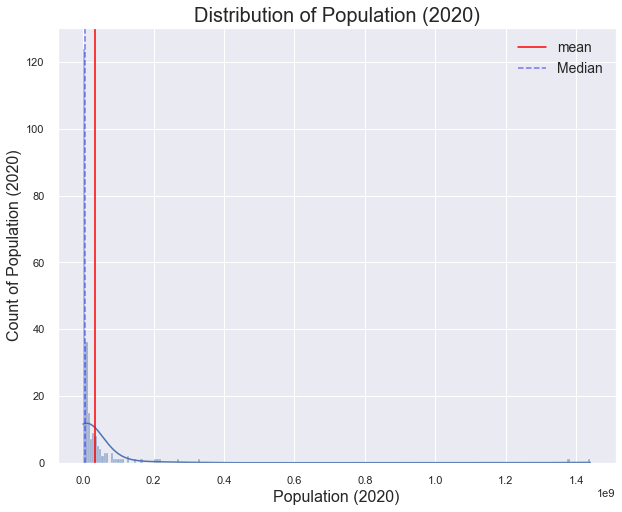

In [73]:
# distribution of population
plot_hist('Population (2020)')

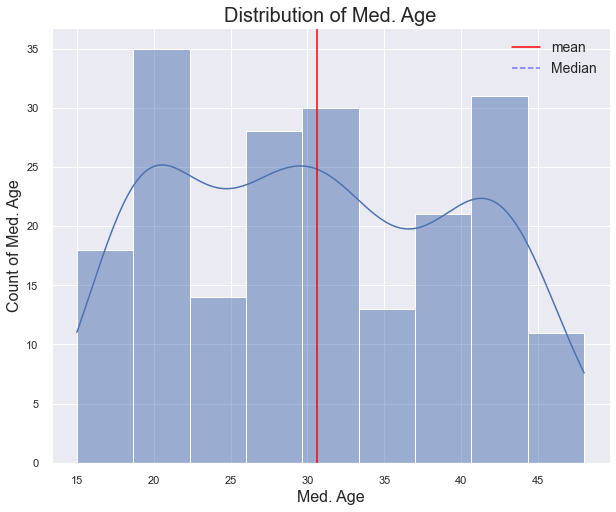

In [74]:
# distribution of median age
plot_hist('Med. Age')

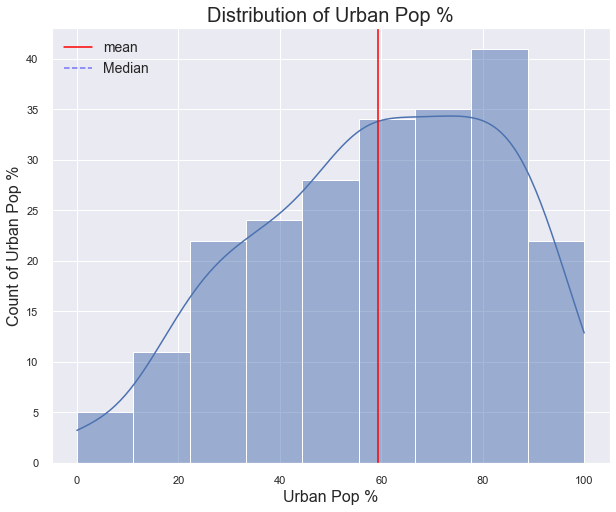

In [75]:
# distribution of Urban Pop %
plot_hist('Urban Pop %')

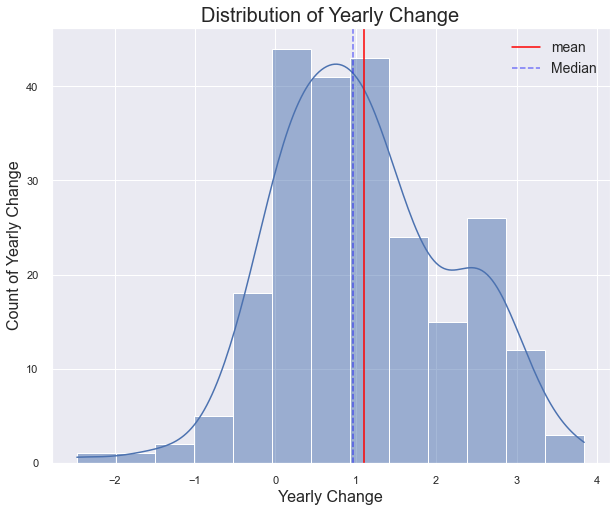

In [76]:
# distribution of Yearly change
plot_hist('Yearly Change')

### sort the population column based on lowest populated countries

In [60]:
data.sort_values(by='Population (2020)')[['Country (or dependency)','Population (2020)']].head(10)

,Country (or dependency),Population (2020)
234,Holy See,801
233,Tokelau,1357
232,Niue,1626
231,Falkland Islands,3480
230,Montserrat,4992
229,Saint Pierre & Miquelon,5794
228,Saint Helena,6077
227,Saint Barthelemy,9877
226,Nauru,10824
225,Wallis & Futuna,11239


In [79]:
data.to_excel('population dataset.xls')

<ipython-input-79-4ae56d26ebd1>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  data.to_excel('population dataset.xls')
